In [ ]:
from pymouse import PyMouse
import random
import time
def sleeptime(hour, min, sec):
    return hour * 3600 + min * 60 + sec
#x=1247 y=650
rantt= random.randrange(2,5)
second = sleeptime(0, 0,rantt)
t=0
while t<1200:
    m=PyMouse()
    m.move(1247+random.randrange(-3,4),650+random.randrange(-3,4))
    m.click(1247+random.randrange(-3,4),650+random.randrange(-3,4))
    time.sleep(second)
    t=t+rantt

      


In [ ]:
from PIL import Image
from PIL import ImageGrab
import time
from pymouse import PyMouse
import random

def sleeptime(hour, min, sec):
    return hour * 3600 + min * 60 + sec
def atclick(x,y,maxt):
    #自动移动至x,y附近的随机坐标并间隔随机时间进行点击 maxts
    rantt= random.randrange(2,5)
    second = sleeptime(0, 0,rantt)
    t=0
    while t < maxt: 
        m=PyMouse()
        print('找到挑战按钮，移动至坐标：x='+str(x)+'y=0'+str(y))
        m.move(x+random.randrange(-3,4),y+random.randrange(-3,4))
        m.click(x+random.randrange(-3,4),y+random.randrange(-3,4))
        time.sleep(second)
        t=t+rantt

      
    im=ImageGrab.grab()
    im.save('./bigimage.png')



(1080, 1920, 3)


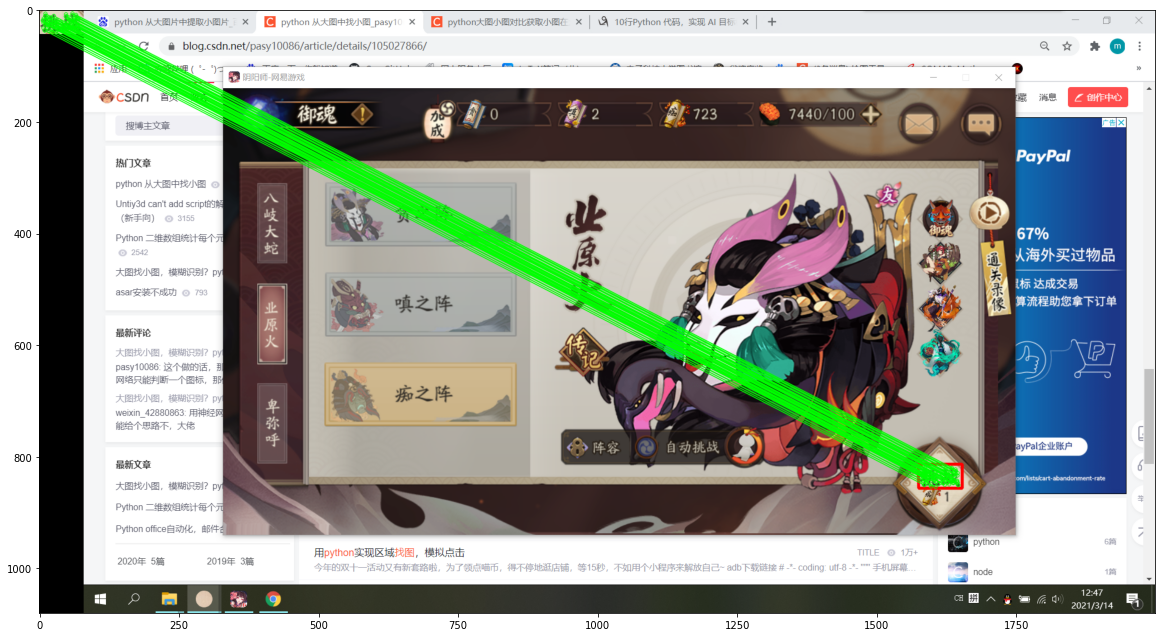

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def matchimage(bigpath,smallpath):
    MIN_MATCH_COUNT = 10
    
    img1 = cv2.imread(smallpath,1)
    img2 = cv2.imread(bigpath,1)
    print(img2.shape)
    # 使用SIFT检测角点
    sift = cv2.SIFT_create()
    # 获取关键点和描述符
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # 定义FLANN匹配器
    index_params = dict(algorithm = 1, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    # 使用KNN算法匹配
    matches = flann.knnMatch(des1,des2,k=2)

    # 去除错误匹配
    good = []
    for m,n in matches:
        if m.distance <= 0.7*n.distance:
            good.append(m)

    # 单应性
    if len(good)>MIN_MATCH_COUNT:
        # 改变数组的表现形式，不改变数据内容，数据内容是每个关键点的坐标位置
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        # findHomography 函数是计算变换矩阵
        # 参数cv2.RANSAC是使用RANSAC算法寻找一个最佳单应性矩阵H，即返回值M
        # 返回值：M 为变换矩阵，mask是掩模
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        # ravel方法将数据降维处理，最后并转换成列表格式
        matchesMask = mask.ravel().tolist()
        # 获取img1的图像尺寸
        h,w,dim = img1.shape
        # pts是图像img1的四个顶点
        pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
        # 计算变换后的四个顶点坐标位置
        dst = cv2.perspectiveTransform(pts,M)
        xmean=(dst[0][0][0]+dst[1][0][0]+dst[2][0][0]+dst[3][0][0])/4
        ymean=(dst[0][0][1]+dst[1][0][1]+dst[2][0][1]+dst[3][0][1])/4
        # 根据四个顶点坐标位置在img2图像画出变换后的边框
        img2 = cv2.polylines(img2,[np.int32(dst)],True,(0,0,255),3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d") % (len(good),MIN_MATCH_COUNT)
        matchesMask = None
     # 显示匹配结果
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
    plt.show()
matchimage('big.png','small.png') 
   


In [5]:
from win32 import win32api, win32gui, win32print
from win32.lib import win32con

from win32.win32api import GetSystemMetrics


def get_real_resolution():
    """获取真实的分辨率"""
    hDC = win32gui.GetDC(0)
    # 横向分辨率
    w = win32print.GetDeviceCaps(hDC, win32con.DESKTOPHORZRES)
    # 纵向分辨率
    h = win32print.GetDeviceCaps(hDC, win32con.DESKTOPVERTRES)
    return w, h


def get_screen_size():
    """获取缩放后的分辨率"""
    w = GetSystemMetrics (0)
    h = GetSystemMetrics (1)
    return w, h

real_resolution = get_real_resolution()
screen_size = get_screen_size()
print(real_resolution)
print(screen_size)

screen_scale_rate = round(real_resolution[0] / screen_size[0], 2)
print(type(screen_scale_rate))


(1920, 1080)
(1536, 864)
<class 'float'>


In [6]:
from PIL import Image
from PIL import ImageGrab
import time
from pymouse import PyMouse
import random
import cv2
import numpy as np
from win32 import win32api, win32gui, win32print
from win32.lib import win32con

from win32.win32api import GetSystemMetrics


def get_real_resolution():
    """获取真实的分辨率"""
    hDC = win32gui.GetDC(0)
    # 横向分辨率
    w = win32print.GetDeviceCaps(hDC, win32con.DESKTOPHORZRES)
    # 纵向分辨率
    h = win32print.GetDeviceCaps(hDC, win32con.DESKTOPVERTRES)
    return w, h


def get_screen_size():
    """获取缩放后的分辨率"""
    w = GetSystemMetrics (0)
    h = GetSystemMetrics (1)
    return w, h

real_resolution = get_real_resolution()
screen_size = get_screen_size()
screen_scale_rate = round(real_resolution[0] / screen_size[0], 2)

def sleeptime(hour, min, sec):
    return hour * 3600 + min * 60 + sec
def atclick(x,y,maxt):
    #自动移动至x,y附近的随机坐标并间隔随机时间进行点击 maxts
    rantt= random.randrange(2,5)
    second = sleeptime(0, 0,rantt)
    t=0
    while t < maxt: 
        m=PyMouse()
        # print('找到挑战按钮，移动至坐标：x=%d,y=%d',x,y)
        m.move(int(float(x+random.randrange(-3,4))/screen_scale_rate),int(float(y+random.randrange(-3,4))/screen_scale_rate))
        m.click(int(float(x+random.randrange(-3,4))/screen_scale_rate),int(float(y+random.randrange(-3,4))/screen_scale_rate))
        time.sleep(second)
        t=t+rantt

def matchimage(bigpath,smallpath):
    #根据给出的大图片和小图片的地址匹配小图片在大图片中的的坐标中心
    MIN_MATCH_COUNT = 10

    img1 = cv2.imread(smallpath,1)
    img2 = cv2.imread(bigpath,1)
    print(img2.shape)
    # 使用SIFT检测角点
    sift = cv2.SIFT_create()
    # 获取关键点和描述符
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # 定义FLANN匹配器
    index_params = dict(algorithm = 1, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    # 使用KNN算法匹配
    matches = flann.knnMatch(des1,des2,k=2)

    # 去除错误匹配
    good = []
    for m,n in matches:
        if m.distance <= 0.7*n.distance:
            good.append(m)

    # 单应性
    if len(good)>MIN_MATCH_COUNT:
        # 改变数组的表现形式，不改变数据内容，数据内容是每个关键点的坐标位置
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        # findHomography 函数是计算变换矩阵
        # 参数cv2.RANSAC是使用RANSAC算法寻找一个最佳单应性矩阵H，即返回值M
        # 返回值：M 为变换矩阵，mask是掩模
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        # ravel方法将数据降维处理，最后并转换成列表格式
        matchesMask = mask.ravel().tolist()
        # 获取img1的图像尺寸
        h,w,dim = img1.shape
        # pts是图像img1的四个顶点
        pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
        # 计算变换后的四个顶点坐标位置
        dst = cv2.perspectiveTransform(pts,M)
        xmean=(dst[0][0][0]+dst[1][0][0]+dst[2][0][0]+dst[3][0][0])/4
        ymean=(dst[0][0][1]+dst[1][0][1]+dst[2][0][1]+dst[3][0][1])/4
        # # 根据四个顶点坐标位置在img2图像画出变换后的边框
        # img2 = cv2.polylines(img2,[np.int32(dst)],True,(0,0,255),3, cv2.LINE_AA)
        return [xmean,ymean]
    else:
        print("Not enough matches are found - %d/%d") % (len(good),MIN_MATCH_COUNT)
        return None
bigpath='big.png'
smallpath='small.png'

aix=matchimage(bigpath,smallpath)
if aix==None:
    print('未能成功匹配')
else:
    x=aix[0]
    y=aix[1]
    atclick(x,y,12)

(1080, 1920, 3)
